In [17]:
%matplotlib inline
import pynucastro as pyna
import numpy as np

In [18]:
c13pg = pyna.Rate("c13-pg-n14-nacr")
c13pg.eval(1.e9)


3883.4778216250666

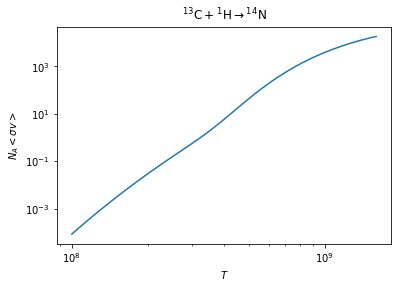

In [19]:
c13pg.plot()

In [20]:

files = ["c12-pg-n13-ls09",
         "c13-pg-n14-nacr",
         "n13--c13-wc12",
         "n13-pg-o14-lg06",
         "n14-pg-o15-im05",
         "n15-pa-c12-nacr",
         "o14--n14-wc12",
         "o15--n15-wc12"]
rc = pyna.RateCollection(files)

In [21]:
print(rc)


c12 + p --> n13
c13 + p --> n14
n13 --> c13
n13 + p --> o14
n14 + p --> o15
n15 + p --> he4 + c12
o14 --> n14
o15 --> n15



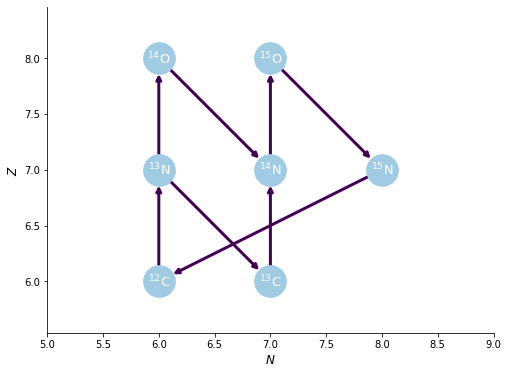

In [22]:
rc.plot()


In [23]:
pynet = pyna.PythonNetwork(files)


In [24]:
comp = pyna.Composition(rc.get_nuclei())
comp.set_solar_like()


In [25]:
re = pyna.Explorer(rc, comp)
re.explore()


interactive(children=(FloatSlider(value=4.0, description='logrho', max=6.0, min=2.0), FloatSlider(value=8.0, d…

In [26]:
pynet.write_network()


import numpy as np
from pynucastro.rates import Tfactors
import numba

ip = 0
ihe4 = 1
ic12 = 2
ic13 = 3
in13 = 4
in14 = 5
in15 = 6
io14 = 7
io15 = 8
nnuc = 9

A = np.zeros((nnuc), dtype=np.int32)

A[ip] = 1
A[ihe4] = 4
A[ic12] = 12
A[ic13] = 13
A[in13] = 13
A[in14] = 14
A[in15] = 15
A[io14] = 14
A[io15] = 15

Z = np.zeros((nnuc), dtype=np.int32)

Z[ip] = 1
Z[ihe4] = 2
Z[ic12] = 6
Z[ic13] = 6
Z[in13] = 7
Z[in14] = 7
Z[in15] = 7
Z[io14] = 8
Z[io15] = 8

@numba.njit()
def ye(Y):
    return np.sum(Z * Y)/np.sum(A * Y)

@numba.njit()
def p_c12__n13(tf):
    # c12 + p --> n13
    rate = 0.0
    
    # ls09n
    rate += np.exp(  17.1482 + -13.692*tf.T913i + -0.230881*tf.T913
                  + 4.44362*tf.T9 + -3.15898*tf.T953 + -0.666667*tf.lnT9)
    # ls09r
    rate += np.exp(  17.5428 + -3.77849*tf.T9i + -5.10735*tf.T913i + -2.24111*tf.T913
                  + 0.148883*tf.T9 + -1.5*tf.lnT9)
    
    return rate

@numba.njit()
def p_c13__n14(tf):
    # c13 + p --> n14
    rate = 0.0
    
 

In [27]:
from pynucastro.networks import StarKillerNetwork

files = ["c12-c12a-ne20-cf88",
         "c12-c12n-mg23-cf88",
         "c12-c12p-na23-cf88",
         "c12-ag-o16-nac2",
         "na23--ne23-toki",
         "ne23--na23-toki",
         "n--p-wc12"]

#urca_net = StarKillerNetwork(files)
#urca_net.write_network()

rc = pyna.RateCollection(files)
print(rc)


c12 + c12 --> he4 + ne20
c12 + c12 --> n + mg23
c12 + c12 --> p + na23
c12 + he4 --> o16
n --> p
na23 --> ne23
ne23 --> na23



http://articles.adsabs.harvard.edu/pdf/1992ApJ...396..649T
Table 1 Net 5 N = 130

**There is a typo in the paper. This is 131 N.**

In [28]:
Nuclei = { 
    "H" : [1,3],
    "He" : [3,4],
    "C" :  [12,14],
    "N" :  [13,15],
    "O" :  [16, 19],
    "F" :  [18, 21], 
    "Ne" : [19,24],
    "Na" : [20, 24],
    "Mg" : [22,27],
    "Al" : [25, 29],
    "Si" : [27, 32],
    "P"  : [29, 33],
    "S"  : [30, 35],
    "Cl" : [33, 37], 
    "Ar" : [35, 39],
    "K"  : [37, 42],
    "Ca" : [39, 44],
    "Sc" : [42, 46], 
    "Ti" : [43, 49],
    "V"  : [46, 51], 
    "Cr" : [47, 52],
    "Mn" : [49, 55],
    "Fe" : [51, 56],
    "Co" : [53, 58],
    "Ni" : [54, 60]    
}
All_Nuclei = []
for Nuc, Num in Nuclei.items():
    for i in range(Num[0], Num[1]+1):
        All_Nuclei.append(Nuc + str(i))
assert len(All_Nuclei) == 130
All_Nuclei.append("n") #neutron

In [29]:
All_Nuclei

['H1',
 'H2',
 'H3',
 'He3',
 'He4',
 'C12',
 'C13',
 'C14',
 'N13',
 'N14',
 'N15',
 'O16',
 'O17',
 'O18',
 'O19',
 'F18',
 'F19',
 'F20',
 'F21',
 'Ne19',
 'Ne20',
 'Ne21',
 'Ne22',
 'Ne23',
 'Ne24',
 'Na20',
 'Na21',
 'Na22',
 'Na23',
 'Na24',
 'Mg22',
 'Mg23',
 'Mg24',
 'Mg25',
 'Mg26',
 'Mg27',
 'Al25',
 'Al26',
 'Al27',
 'Al28',
 'Al29',
 'Si27',
 'Si28',
 'Si29',
 'Si30',
 'Si31',
 'Si32',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'S30',
 'S31',
 'S32',
 'S33',
 'S34',
 'S35',
 'Cl33',
 'Cl34',
 'Cl35',
 'Cl36',
 'Cl37',
 'Ar35',
 'Ar36',
 'Ar37',
 'Ar38',
 'Ar39',
 'K37',
 'K38',
 'K39',
 'K40',
 'K41',
 'K42',
 'Ca39',
 'Ca40',
 'Ca41',
 'Ca42',
 'Ca43',
 'Ca44',
 'Sc42',
 'Sc43',
 'Sc44',
 'Sc45',
 'Sc46',
 'Ti43',
 'Ti44',
 'Ti45',
 'Ti46',
 'Ti47',
 'Ti48',
 'Ti49',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'Cr47',
 'Cr48',
 'Cr49',
 'Cr50',
 'Cr51',
 'Cr52',
 'Mn49',
 'Mn50',
 'Mn51',
 'Mn52',
 'Mn53',
 'Mn54',
 'Mn55',
 'Fe51',
 'Fe52',
 'Fe53',
 'Fe54',
 'Fe55',
 

In [30]:
library_file = '../results07070315'
mylibrary = pyna.rates.Library(library_file)
escn_tabular = ["f20--o20-toki","ne20--f20-toki","o20--f20-toki","f20--ne20-toki"]                

In [31]:
Net5_TW1992_lib = mylibrary.linking_nuclei(All_Nuclei, with_reverse=False)

In [32]:
from pynucastro import Nucleus
new_rates = []
#screens out duplicate rates that we include in the escn_tabular.
for rate in Net5_TW1992_lib.get_rates():
    if rate.reactants == [Nucleus("f20")] and rate.products == [Nucleus("o20")]:
        continue
    elif rate.reactants == [Nucleus("ne20")] and rate.products == [Nucleus("f20")]:
        continue
    elif rate.reactants == [Nucleus("o20")] and rate.products == [Nucleus("f20")]:
        continue
    elif rate.reactants == [Nucleus("f20")] and rate.products == [Nucleus("ne20")]:
        continue
    else:
        new_rates.append(rate)

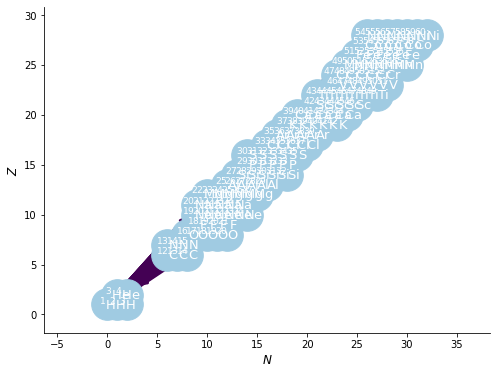

In [33]:
Net5_TW1992 = pyna.networks.StarKillerNetwork(rates = new_rates, rate_files=escn_tabular)
Net5_TW1992.plot()

In [34]:
Net5_TW1992.write_network()

tfile /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pynucastro/templates/starkiller-microphysics/xin.pynucastro.64.template
tfile /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pynucastro/templates/starkiller-microphysics/inputs.burn_cell.VODE.template
tfile /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pynucastro/templates/starkiller-microphysics/NETWORK_REQUIRES.template
tfile /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pynucastro/templates/starkiller-microphysics/reaclib_rates.F90.template
tfile /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pynucastro/templates/starkiller-microphysics/xin.pynucastro.256.template
tfile /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pynucastro/templates/starkiller-microphysics/actual_burner.F90.template
tfile /Library/Frameworks/Python.framework/Versions/3.8/lib/

In [ ]:
Nuclei = { 
    "H" : [1,3],
    "He" : [3,4],
    "C" : [12,12],
    "N" : [14,15],
    "O" : [16, 18],
    "F" : [19, 20], 
    "Ne" : [19,21],
    "Na" : [22, 24],
    "Mg" : [23, 26],
    "Al" : [26, 28],
    "Si" : [27, 30],
    "P"  : [30, 32],
    "S"  : [31, 34],
    "Cl" : [35, 37], 
    "Ar" : [36, 38],
    "K"  : [39, 41],
    "Ca" : [40, 44],
    "Sc" : [43, 45], 
    "Ti" : [44, 48],
    "V"  : [47, 49], 
    "Cr" : [48, 52],
    "Mn" : [51, 54],
    "Fe" : [52, 56],
    "Co" : [55, 57],
    "Ni" : [56, 58]    
}
All_Nuclei = []
for Nuc, Num in Nuclei.items():
    for i in range(Num[0], Num[1]+1):
        All_Nuclei.append(Nuc + str(i))
All_Nuclei.append("n") #neutron
assert len(All_Nuclei) == 83
Net4_TW1992_lib = mylibrary.linking_nuclei(All_Nuclei, with_reverse=False)
Net4_TW1992 = pyna.networks.StarKillerNetwork(libraries=Net4_TW1992_lib)
Net4_TW1992.write_network()
